# ANZ Data Virtual Internship - Task 1

In [1]:
# Imports
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas as gpd 
from shapely.geometry import Point 
from geopandas import GeoDataFrame
import plotly_express as px

#Pandas settings
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# seaborn settings
sns.set_style("darkgrid")

## Data Importing and Exploratory Data Analysis

In [2]:
# read in csv file 
data = pd.read_csv('ANZ_synthesised_transaction_dataset.csv')
# display head
data.head()

,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,balance,date,gender,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement
0,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,NaN,Diana,35.39,1/8/18,F,26,Ashmore,QLD,2018-08-01T01:01:15.000+0000,16.25,a623070bfead4541a6b0fff8a09e706c,Australia,CUS-2487424745,153.38 -27.99,debit
1,authorized,0.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,NaN,Diana,21.20,1/8/18,F,26,Sydney,NSW,2018-08-01T01:13:45.000+0000,14.19,13270a2a902145da9db4c951e04b51b9,Australia,CUS-2487424745,151.21 -33.87,debit
2,authorized,1.0,NaN,ACC-1222300524,AUD,151.23 -33.94,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,NaN,Michael,5.71,1/8/18,M,38,Sydney,NSW,2018-08-01T01:26:15.000+0000,6.42,feb79e7ecd7048a5a36ec889d1a94270,Australia,CUS-2142601169,151.21 -33.87,debit
3,authorized,1.0,NaN,ACC-1037050564,AUD,153.10 -27.66,SALES-POS,48514682-c78a-4a88-b0da-2d6302e64673,NaN,Rhonda,2117.22,1/8/18,F,40,Buderim,QLD,2018-08-01T01:38:45.000+0000,40.90,2698170da3704fd981b15e64a006079e,Australia,CUS-1614226872,153.05 -26.68,debit
4,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,b4e02c10-0852-4273-b8fd-7b3395e32eb0,NaN,Diana,17.95,1/8/18,F,26,Mermaid Beach,QLD,2018-08-01T01:51:15.000+0000,3.25,329adf79878c4cf0aeb4188b4691c266,Australia,CUS-2487424745,153.44 -28.06,debit


In [3]:
data.shape

(12043, 23)

In [4]:
data.describe() #Perform basic summary stats on numeric columns

,card_present_flag,merchant_code,balance,age,amount
count,7717.000000,883.0,12043.000000,12043.000000,12043.000000
mean,0.802644,0.0,14704.195553,30.582330,187.933588
std,0.398029,0.0,31503.722652,10.046343,592.599934
min,0.000000,0.0,0.240000,18.000000,0.100000
25%,1.000000,0.0,3158.585000,22.000000,16.000000
50%,1.000000,0.0,6432.010000,28.000000,29.000000
75%,1.000000,0.0,12465.945000,38.000000,53.655000
max,1.000000,0.0,267128.520000,78.000000,8835.980000


Noting above that the pd.describe displays float and integer objects only, this means many other columns are encoded as objects. The below code calls upon df.dtypes to determine the types of values in each column.

In [5]:
data.dtypes

status                object
card_present_flag    float64
bpay_biller_code      object
account               object
currency              object
long_lat              object
txn_description       object
merchant_id           object
merchant_code        float64
first_name            object
balance              float64
date                  object
gender                object
age                    int64
merchant_suburb       object
merchant_state        object
extraction            object
amount               float64
transaction_id        object
country               object
customer_id           object
merchant_long_lat     object
movement              object
dtype: object

In [6]:
data.nunique() # Determines the number of unique values per column

status                   2
card_present_flag        2
bpay_biller_code         3
account                100
currency                 1
long_lat               100
txn_description          6
merchant_id           5725
merchant_code            1
first_name              80
balance              12006
date                    91
gender                   2
age                     33
merchant_suburb       1609
merchant_state           8
extraction            9442
amount                4457
transaction_id       12043
country                  1
customer_id            100
merchant_long_lat     2703
movement                 2
dtype: int64

The above code shows us that as per the description we do indeed have 100 customers data based off 100 unique values for the accounts column.

In [7]:
data.isnull().sum() # counts the number of null values for each column

status                   0
card_present_flag     4326
bpay_biller_code     11158
account                  0
currency                 0
long_lat                 0
txn_description          0
merchant_id           4326
merchant_code        11160
first_name               0
balance                  0
date                     0
gender                   0
age                      0
merchant_suburb       4326
merchant_state        4326
extraction               0
amount                   0
transaction_id           0
country                  0
customer_id              0
merchant_long_lat     4326
movement                 0
dtype: int64

In [8]:
# Check the percentage of missing values per column
print("Percentage of missing values:")
print()
for column in data.columns:
    print(f'Column {column} has'
          f' {100 * sum(data[column].isna()) / len(data):.2f}%'
          f' missing values')

Percentage of missing values:

Column status has 0.00% missing values
Column card_present_flag has 35.92% missing values
Column bpay_biller_code has 92.65% missing values
Column account has 0.00% missing values
Column currency has 0.00% missing values
Column long_lat has 0.00% missing values
Column txn_description has 0.00% missing values
Column merchant_id has 35.92% missing values
Column merchant_code has 92.67% missing values
Column first_name has 0.00% missing values
Column balance has 0.00% missing values
Column date has 0.00% missing values
Column gender has 0.00% missing values
Column age has 0.00% missing values
Column merchant_suburb has 35.92% missing values
Column merchant_state has 35.92% missing values
Column extraction has 0.00% missing values
Column amount has 0.00% missing values
Column transaction_id has 0.00% missing values
Column country has 0.00% missing values
Column customer_id has 0.00% missing values
Column merchant_long_lat has 35.92% missing values
Column move

Based off the above code, we have significant numbers of null values in the dataset. However considering this is transactional data:

    1. Not all payments were via Bpay - hence we have a lack of values in bpay_biller_code
    2. We have 4326 missing values in the card_present_flag, merchant_id, merchant_suburb, merchant_state and   merchant_long_lat columns. This could be due to the card not being present at the time of transaction (online or manual purchases) or for another reason entirely.
    3. We are missing a lot of data in the merchant_code column (~92%). This could be due to most transctions (~92%) are not Bpay transactions and will hence not have a merchant code. As such we should remove this column alongside the bpay_biller_code column.

## Data Cleaning

In [9]:
# assign to clean data frame variable
data_clean = data

# split up lat_long column into lat and long for ease of plotting later
data_clean[['long','lat']] = data_clean['long_lat'].str.split(' ', expand=True)

# split up merchant long_lat into lat and long for ease of plotting later
data_clean[['merchant_long','merchant_lat']] = data_clean['merchant_long_lat'].str.split(' ', expand=True)
#data_clean.head() # Sanity check

In [10]:
# drop columns missing signifcant amounts of data / unneeded columns:

# 1. merchant_code - missing data (see above)
# 2. currency - all in AUD in this dataset (based off unique values)
# 3. country - all in Australia in this dataset (based off unique values)
# 4. long_lat - not needed after split above
# 5. merchant_long_lat - not needed after split above
data_clean = data_clean.drop(['merchant_code','currency', 'country', 'long_lat','merchant_long_lat', 'bpay_biller_code'], axis=1)

In [11]:
# Change dtypes to numeric for all latitude and longitude columns
data_clean = data_clean.astype({'long':'float64', 'lat':'float64', 'merchant_long':'float64', 'merchant_lat':'float64'})


In [12]:
# ensure that the date column is a datetime object
data_clean['date'] = pd.to_datetime(data_clean['date'], format= '%d/%m/%y')

In [13]:
# extract day of week from date and add to df - represented by number
data_clean['weekday'] = data_clean['date'].dt.dayofweek

# create dictonary of name of days based off pandas dayofweek function
day_of_week_names={0:'Monday', 1:'Tuesday', 2:'Wednesday', 3:'Thursday', 4:'Friday', 5:'Saturday', 6:'Sunday'}

# assign and map weekday column to our dictonary of day names
data_clean['weekday'] = data_clean['date'].dt.dayofweek.map(day_of_week_names)

# extract the hour from the extraction column - first convert to datetime then reassign to the hour of the datetime
data_clean['time_hour'] = pd.to_datetime(data_clean['extraction'])
data_clean['time_hour'] = data_clean['time_hour'].dt.hour

In [14]:
# Sort data by date
data_clean.sort_values(by=['date'], inplace=True)

In [15]:
data_clean.describe()

,card_present_flag,balance,age,amount,long,lat,merchant_long,merchant_lat,time_hour
count,7717.000000,12043.000000,12043.000000,12043.000000,12043.000000,12043.000000,7717.000000,7717.000000,12043.000000
mean,0.802644,14704.195553,30.582330,187.933588,143.648563,-38.164347,143.433277,-32.752651,13.268621
std,0.398029,31503.722652,10.046343,592.599934,16.669352,54.622791,12.090074,5.282423,5.777284
min,0.000000,0.240000,18.000000,0.100000,114.620000,-573.000000,113.830000,-43.310000,0.000000
25%,1.000000,3158.585000,22.000000,16.000000,138.690000,-37.700000,144.680000,-37.710000,9.000000
50%,1.000000,6432.010000,28.000000,29.000000,145.230000,-33.890000,145.830000,-33.840000,13.000000
75%,1.000000,12465.945000,38.000000,53.655000,151.220000,-30.750000,151.210000,-29.440000,18.000000
max,1.000000,267128.520000,78.000000,8835.980000,255.000000,-12.370000,153.610000,-12.330000,23.000000


Noting the above that in the 'lat' and 'long' columns we have large values of 255 degrees and -573 degrees respectively. These values for latitude and longitude are not possible.

In [16]:
# Investigate the above by locating rows where -573 is the value in the 'lat' column
data_clean.loc[data_clean['lat'] == -573].head() # note --> .head() used here simply to trim output as there is a number of rows - remove .head() to investigate all rows as required.

,status,card_present_flag,account,txn_description,merchant_id,first_name,balance,date,gender,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,customer_id,movement,long,lat,merchant_long,merchant_lat,weekday,time_hour
99,posted,NaN,ACC-2901672282,PAYMENT,NaN,Daniel,1162.08,2018-08-01,M,22,NaN,NaN,2018-08-01T17:00:00.000+0000,33.00,c539e04478c94bb2b48af6e0069a011b,CUS-1617121891,debit,255.0,-573.0,NaN,NaN,Wednesday,17
51,posted,NaN,ACC-2901672282,PAYMENT,NaN,Daniel,1195.08,2018-08-01,M,22,NaN,NaN,2018-08-01T11:00:00.000+0000,95.00,62e49c215d7e45609556936fd7e860ce,CUS-1617121891,debit,255.0,-573.0,NaN,NaN,Wednesday,11
47,authorized,0.0,ACC-2901672282,SALES-POS,7ce5471b-363c-46ab-b398-ca517347829a,Daniel,1290.08,2018-08-01,M,22,Sydney,NSW,2018-08-01T10:27:08.000+0000,31.62,826f09d26daf4b7282f597cabfecaf81,CUS-1617121891,debit,255.0,-573.0,151.21,-33.87,Wednesday,10
392,posted,NaN,ACC-2901672282,PAY/SALARY,NaN,Daniel,4490.85,2018-08-03,M,22,NaN,NaN,2018-08-03T17:00:00.000+0000,3328.77,035f7e013df6486f80e2245bea04a28f,CUS-1617121891,credit,255.0,-573.0,NaN,NaN,Friday,17
531,authorized,1.0,ACC-2901672282,POS,e957b3e1-e8d7-49a4-98a9-e5feba8b1a74,Daniel,4326.96,2018-08-04,M,22,Bondi Junction,NSW,2018-08-04T19:27:41.000+0000,54.58,fb1537fbbce94c65af282b97ecbba751,CUS-1617121891,debit,255.0,-573.0,151.25,-33.89,Saturday,19


From the above output we can see that our unsual value for longitude of 255 degrees appears to be for the same customer (Daniel) whos latitude value is -573. Whilst the remaining data could be accurate, we will drop these rows as this will throw off our visualisations later on.

In [17]:
# assign the indexs of the affending rows
indexnames_daniel_latlong = data_clean[data_clean['lat']==-573].index
# drop rows with the corresponding index from data_clean
data_clean.drop(indexnames_daniel_latlong, inplace=True)

In [18]:
print('Therefore a loss of {} rows of data.'.format(data.shape[0]-data_clean.shape[0]))

Therefore a loss of 123 rows of data.


## Insights into the dataset

In [19]:
# Average transaction amount
print('The average transaction amount is ${:.2f} and the median transaction amount is ${:.2f}'.format((data_clean['amount'].mean()), data_clean['amount'].median()))

print() # creating a space in output
# Average number of transaction per customer over the 3 month period
print('The average number of transaction per person over the 3 month period is {:.2f} and the median number of transactions is {:.2f}'.format(data_clean['customer_id'].value_counts().mean(), data_clean['customer_id'].value_counts().median()))

print() # creating a space in output
# Average balance in an ANZ account across the 3 month period
print('The average balance in an ANZ account across the 3 month period is ${:.2f} and the median balance is ${:.2f}'.format(data_clean['balance'].mean(), data_clean['balance'].median()))

The average transaction amount is $187.10 and the median transaction amount is $28.74

The average number of transaction per person over the 3 month period is 120.40 and the median number of transactions is 109.00

The average balance in an ANZ account across the 3 month period is $14796.44 and the median balance is $6462.94


The above output is showing us that the average transaction amount has been greatly affected by outliers, with an average transaction amount of *$187 and a median value of *$29. 

The code above also shows that there is a relatively small difference in the average and median number of transactions per customer across the 3 month period, thus we can conclude that the number of transactions per customer was evenly distributed in this time period.

The average balance in an ANZ account at the time of transaction also differed largely compared to the median balance in an account. The average balance across the time period was *$14707, and the median balance was *$6432, indicating the presence of outliers in the dataset (ie. accounts with large balances).

### Transaction volume

In [20]:
# count the number of transaction per day - store as df
date_transactions_counting = data_clean.groupby('date').count()

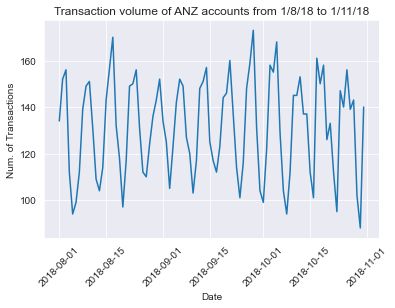

In [21]:
# seaborn lineplot using grouped dataframe of transactions and dates to form transaction volume
sns.lineplot(date_transactions_counting.index, date_transactions_counting['customer_id'])
plt.xticks(rotation=45)
plt.xlabel('Date')
plt.ylabel('Num. of Transactions')
plt.title('Transaction volume of ANZ accounts from 1/8/18 to 1/11/18')
plt.show()

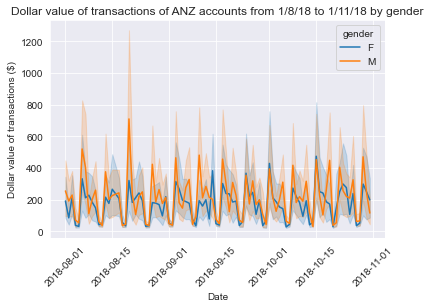

In [22]:
sns.lineplot(x='date', y='amount', data=data_clean, hue='gender')
plt.xticks(rotation=45)
plt.xlabel('Date')
plt.ylabel('Dollar value of transactions ($)')
plt.title('Dollar value of transactions of ANZ accounts from 1/8/18 to 1/11/18 by gender')
plt.show()

We can see a trend here, lets break this down to examine transactions across a day and a week.

### Spending across a typical week and day

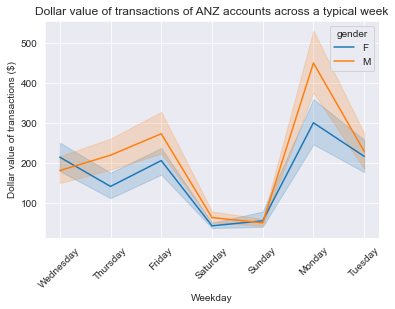

In [23]:
# sns lineplot
sns.lineplot(x='weekday', y='amount', data=data_clean, hue='gender')
plt.xticks(rotation=45)
plt.xlabel('Weekday')
plt.ylabel('Dollar value of transactions ($)')
plt.title('Dollar value of transactions of ANZ accounts across a typical week')
plt.show()

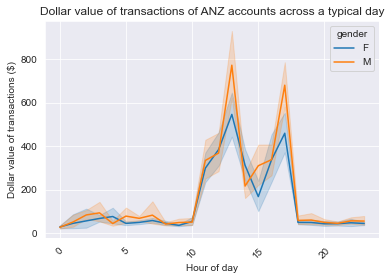

In [24]:
# sns lineplot
sns.lineplot(x='time_hour', y='amount', data=data_clean, hue='gender')
plt.xticks(rotation=45)
plt.xlabel('Hour of day')
plt.ylabel('Dollar value of transactions ($)')
plt.title('Dollar value of transactions of ANZ accounts across a typical day')
plt.show()

Interestingly we can see that transactions for both males and females increase at the begining of the work week (Monday) and then decrease on a Tuesday. Males in the datset tend to then increase spending until Friday before spedning drops on a weekend. Females in the dataset tend to spend less on a Thursday before increasing spending on a Friday. Furthermore we found that most transactions typcially occur for both genders between 10am and 3pm and then 3pm to around 5-7pm.

### Transactions by State

In [25]:
# create new df of the sum of transactions grouped by the merchants state
merchant_groupby_state = data_clean.groupby(['merchant_state'])['amount'].sum().reset_index()
# sort by largest first
merchant_groupby_state = merchant_groupby_state.sort_values('amount', ascending=False)
merchant_groupby_state.head(8) # 8 states and territories

,merchant_state,amount
1,NSW,99272.77
6,VIC,86730.70
3,QLD,52917.30
7,WA,33807.41
4,SA,16673.02
2,NT,9168.89
0,ACT,3395.97
5,TAS,1962.93


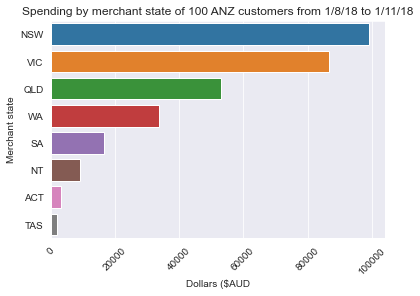

In [26]:
# visualise the above dataframe
sns.barplot(x='amount', y='merchant_state', data=merchant_groupby_state)
plt.xticks(rotation=45)
plt.xlabel('Dollars ($AUD')
plt.ylabel('Merchant state')
plt.title('Spending by merchant state of 100 ANZ customers from 1/8/18 to 1/11/18')
plt.show()

This is in line with the population rates of each state and territory of Australia. 

Source:(https://en.wikipedia.org/wiki/States_and_territories_of_Australia#States_and_territories)

In [27]:
# create new df of the sum of transactions by merchant state per date - ie. the total of transactions (AUD) done in a state per day
merchant_groupby_state_date = data_clean.groupby(['date','merchant_state'])['amount'].sum().reset_index()
# sort by largest first
merchant_groupby_state_date = merchant_groupby_state_date.sort_values('amount', ascending=False)
merchant_groupby_state_date.head()

,date,merchant_state,amount
543,2018-10-21,QLD,7720.32
395,2018-09-29,NSW,5831.31
482,2018-10-12,QLD,4624.66
553,2018-10-22,VIC,4202.75
243,2018-09-06,NSW,3816.98


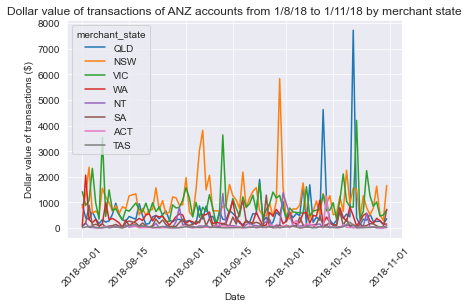

In [28]:
# visualise the above dataframe
sns.lineplot(x='date', y='amount', data=merchant_groupby_state_date, hue='merchant_state')
plt.xticks(rotation=45)
plt.xlabel('Date')
plt.ylabel('Dollar value of transactions ($)')
plt.title('Dollar value of transactions of ANZ accounts from 1/8/18 to 1/11/18 by merchant state')
plt.show()

The above shows that the largest 3 states by population (NSW, VIC, QLD) have the highest spending over time. Notably there was a significant increase in spending in NSW on the 29th of September 2018 and in QLD on the 21st of October 2018

In [29]:
# new df of the sum of transactions aggregated by merchant suburb
merchant_groupby_suburb = data_clean.groupby(['merchant_suburb'])['amount'].sum().reset_index()
merchant_groupby_suburb = merchant_groupby_suburb.sort_values('amount', ascending=False)
merchant_groupby_suburb.head()

,merchant_suburb,amount
1379,Sydney,20303.55
893,Melbourne,11746.02
1321,South Brisbane,11740.58
880,Mascot,10282.62
978,Mount Gambier,4710.25


The above dataframe shows that the majority of spending on these ANZ accounts is occuring in major CBD's and surrounding suburbs.

### Geographical plotting of Transactions

In [30]:
# using point from shaply - zip together long and lat columns to create our coorinates
transactions_geographical_lat_long = [Point(xy) for xy in zip(data_clean['long'], data_clean['lat'])]
# create geo pandas df using above zipped coordinates and link with data_clean
dataframe_geopandas = GeoDataFrame(data_clean, geometry= transactions_geographical_lat_long)
# create plotly express scatter geo plot
fig = px.scatter_geo(dataframe_geopandas, lat=dataframe_geopandas.geometry.y, lon=dataframe_geopandas.geometry.x, hover_name='amount')
fig.update_geos(fitbounds='locations')  # ensures zoom level is on Aus
fig.show()

## Saving dataset to pickle for later analysis

In [31]:
data_clean.to_pickle('anz_data_clean.pickle')